## Prácticas Naive Bayes y KNN (ejercicio 4)

#### 1. Tomando como base este [tutorial](https://colab.research.google.com/drive/1zFIOfrceEaFkhQOEOkMWroBmNV1HAMVS?usp=drive_link),  crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de [validación cruzada](https://educacionadistancia.juntadeandalucia.es/centros/cordoba/pluginfile.php/406946/mod_resource/content/1/M2_SAA_S10%20-%20Validaci%C3%B3n.pdf).

#### 2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el [vídeo 5](https://vimeo.com/600140324). Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.

#### 3. En este [enlace](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.

#### **4. Plantea el problema anterior con un modelo de regresión usando KNN. En el [vídeo 7](https://vimeo.com/600141357) hay un ejemplo de regresión con KNN.**

#### 5. Usando los datos almacenados en data5.csv, crea un modelo de clasificación usando NaiveBayes y KNN. Haz un estudio inicial de las correlaciones entre las variables.

#### author: Virginia Ordoño Bernier - date: december 2023


### 1. Carga de datos

In [1]:
import pandas as pd

df_wine = pd.read_csv("data/winequality-red.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Comprobación tipo de datos y nulos

In [2]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [3]:
total_nulls = df_wine.isnull().sum()
total_nulls

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3. Preparación de Datos

In [4]:
from sklearn.model_selection import train_test_split

# Array with column names except target
wine_features = df_wine.columns[:11]

# Separación de variables predictoras y variable objetivo:
X = df_wine[wine_features]
y = df_wine['quality'] 

# Separación datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#X.reset_index(inplace = True)

### 4. KNN Regressor

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Parameters
k = 5
w = 'distance' # More precission. Check exercise 3

# Select regressor
reg_model = KNeighborsRegressor(n_neighbors=k, weights=w)

# Training
reg_model.fit(X_train, y_train)

# Prediction
y_pred = reg_model.predict(X_test)

# Evaluation
accuracy = mean_squared_error(y_pred, y_test)
print(f"Precisión del modelo con KNeighborsRegressor: {accuracy:.2f}")


Precisión del modelo con KNeighborsRegressor: 0.50


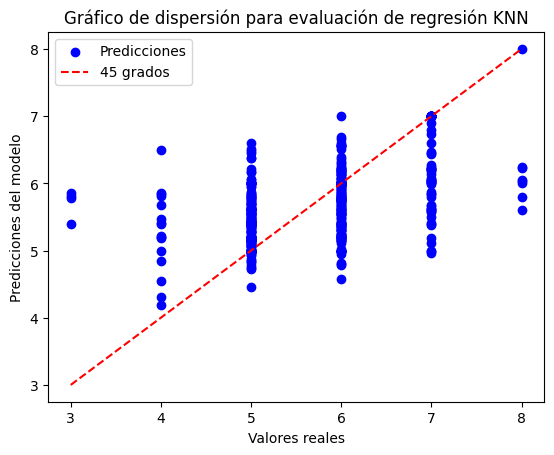

In [6]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

# Dibujar la línea de 45 grados para comparación
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='45 grados')

# Etiquetas y título
plt.xlabel('Valores reales')
plt.ylabel('Predicciones del modelo')
plt.title('Gráfico de dispersión para evaluación de regresión KNN')
plt.legend()
plt.show()

# Eje x = valores reales
# eje y = predicciones
# Cada punto en el gráfico representa un par de valores (valor real, predicción del modelo)
# La línea actúa como una referencia para la comparación: si todos los puntos azules estuvieran en esta línea, las predicciones serían perfectas.


### Conclusión

La regresión no es un modelo adecuado para esta conjunto de datos